In [1]:
import sys
sys.path.append("../src/")
sys.path.append("../src/AtomicH")

In [2]:
import dipolelosses
import potentials
import constants
import numpy as np
import pylab as plt
from dipolelosses import DipoleChannels

In [3]:
B_values = np.logspace(-3,1,50)

pot      = potentials.Silvera_Triplet
potT      = potentials.Silvera_Triplet_T
potJ      = potentials.Jamieson_Triplet_HFD_T
T        = 5e-4

GVsB_H=[]
GVsB_T=[]
GVsB_Ad_T=[]
GVsB_Jamieson_T=[]

for c in DipoleChannels:
    Gs=[]
    for B in B_values:
        Gs.append(dipolelosses.GetGFactor(c,  B, constants.HydrogenConstants(), T, pot,rhos=np.linspace(1e-9,0.75,2000),lin=0,lout=2))
    GVsB_H.append(np.array(Gs))
    Gs=[]
    Gs_Ad=[]
    Gs_Jamieson=[]

    for B in B_values:
        Gs.append(dipolelosses.GetGFactor(c,  B, constants.TritiumConstants(), T, pot,rhos=np.linspace(1e-9,0.75,2000),lin=0,lout=2))
        Gs_Ad.append(dipolelosses.GetGFactor(c,  B, constants.TritiumConstants(), T, potT,rhos=np.linspace(1e-9,0.75,2000),lin=0,lout=2))
        Gs_Jamieson.append(dipolelosses.GetGFactor(c,  B, constants.TritiumConstants(), T, potJ,rhos=np.linspace(1e-9,0.75,2000),lin=0,lout=2))
    GVsB_T.append(np.array(Gs))
    GVsB_Ad_T.append(np.array(Gs_Ad))
    GVsB_Jamieson_T.append(np.array(Gs_Jamieson))


/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/dipolelosses.py:66: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand, rhos[0], rhos[-1])[0] / (P1 * P2)
/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/spinbasis.py:283: RuntimeWarning: divide by zero encountered in matmul
  Rets[m]=TransformMatrix(np.matmul(np.matmul(TripletProj,SigMatrix),TripletProj),Rotator)
/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/spinbasis.py:283: RuntimeWarning: overflow encountered in matmul
  Ret

In [4]:
# Uncomment one of these lines for preferred x-axis convention.

# To make the plots with real B on x axis
B_display=B_values

# To make the plots with Stoof scaled B on x axis
#B_display=dipolelosses.B_Naught(B_values)

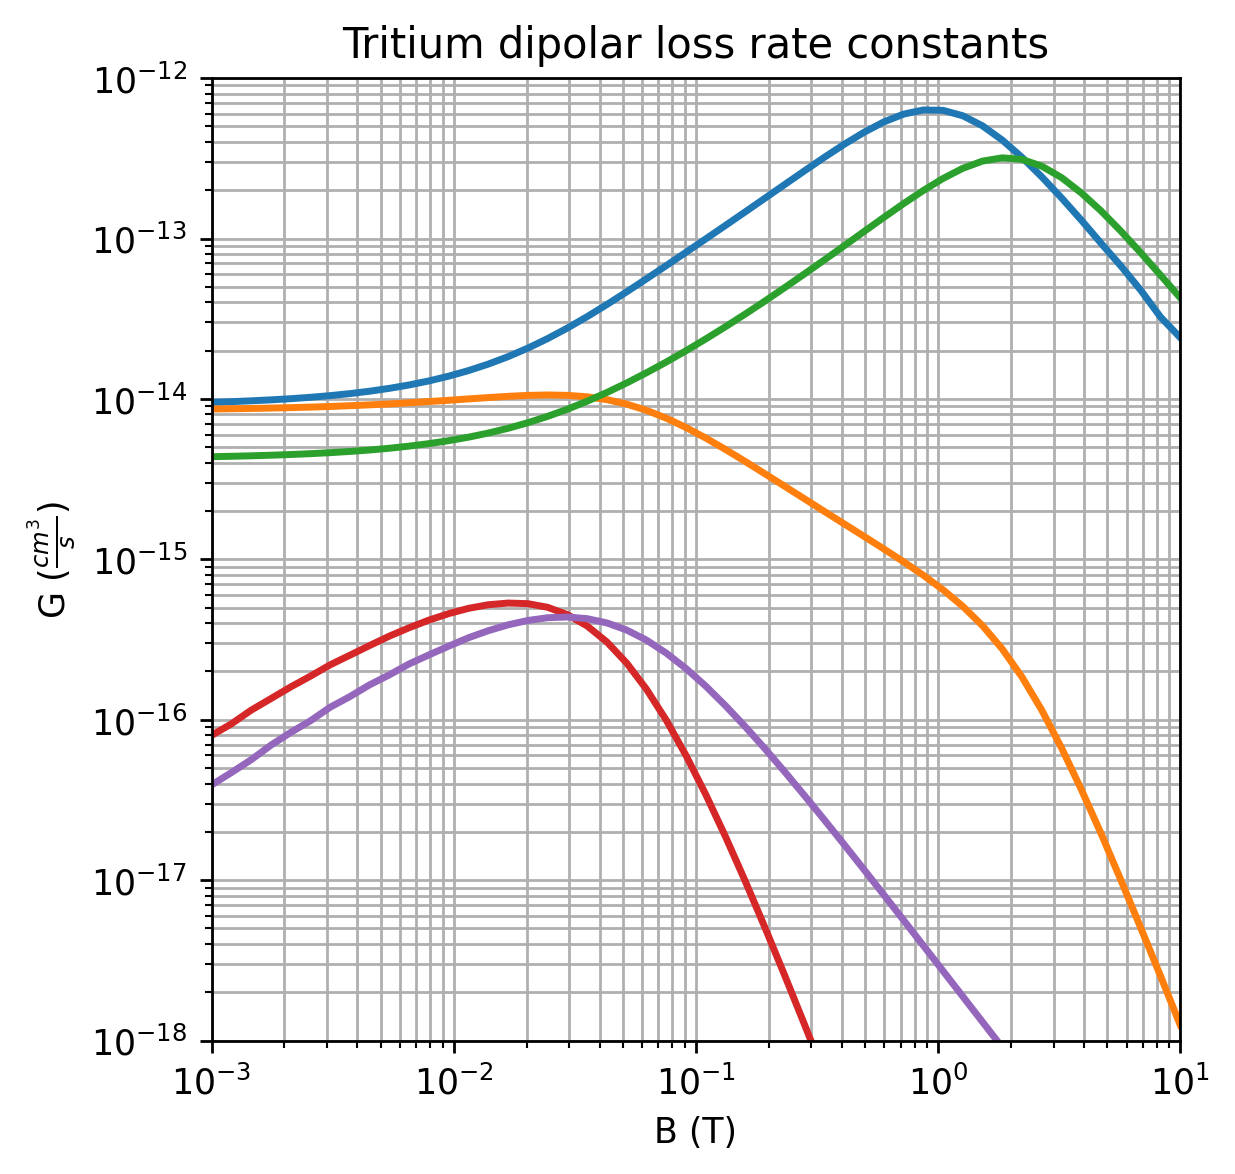

In [7]:
B_corrected = dipolelosses.B_Naught(B_values)
plt.figure(figsize=(5,5),dpi=250)
for ci in range(0,len(DipoleChannels)):
    Label='dd --> '+str(DipoleChannels[ci]['alphaprime'])+str(DipoleChannels[ci]['betaprime'])
    plt.plot(B_values,GVsB_T[ci],linewidth=2)
    #plt.plot(B_values,GVsB_Jamieson_T[ci],'--',linewidth=1)

plt.xlabel("B (T)")
plt.xlim(0.001, 10)
plt.ylabel(r'G ($\frac{cm^3}{s}$)')
plt.ylim(1e-18, 1e-12)
plt.title("Tritium dipolar loss rate constants")
plt.grid(which='both')
#plt.legend(fontsize=9)
plt.loglog()
plt.savefig("./Plots/DipoleLossesTT.png",bbox_inches='tight',dpi=250)
plt.show()

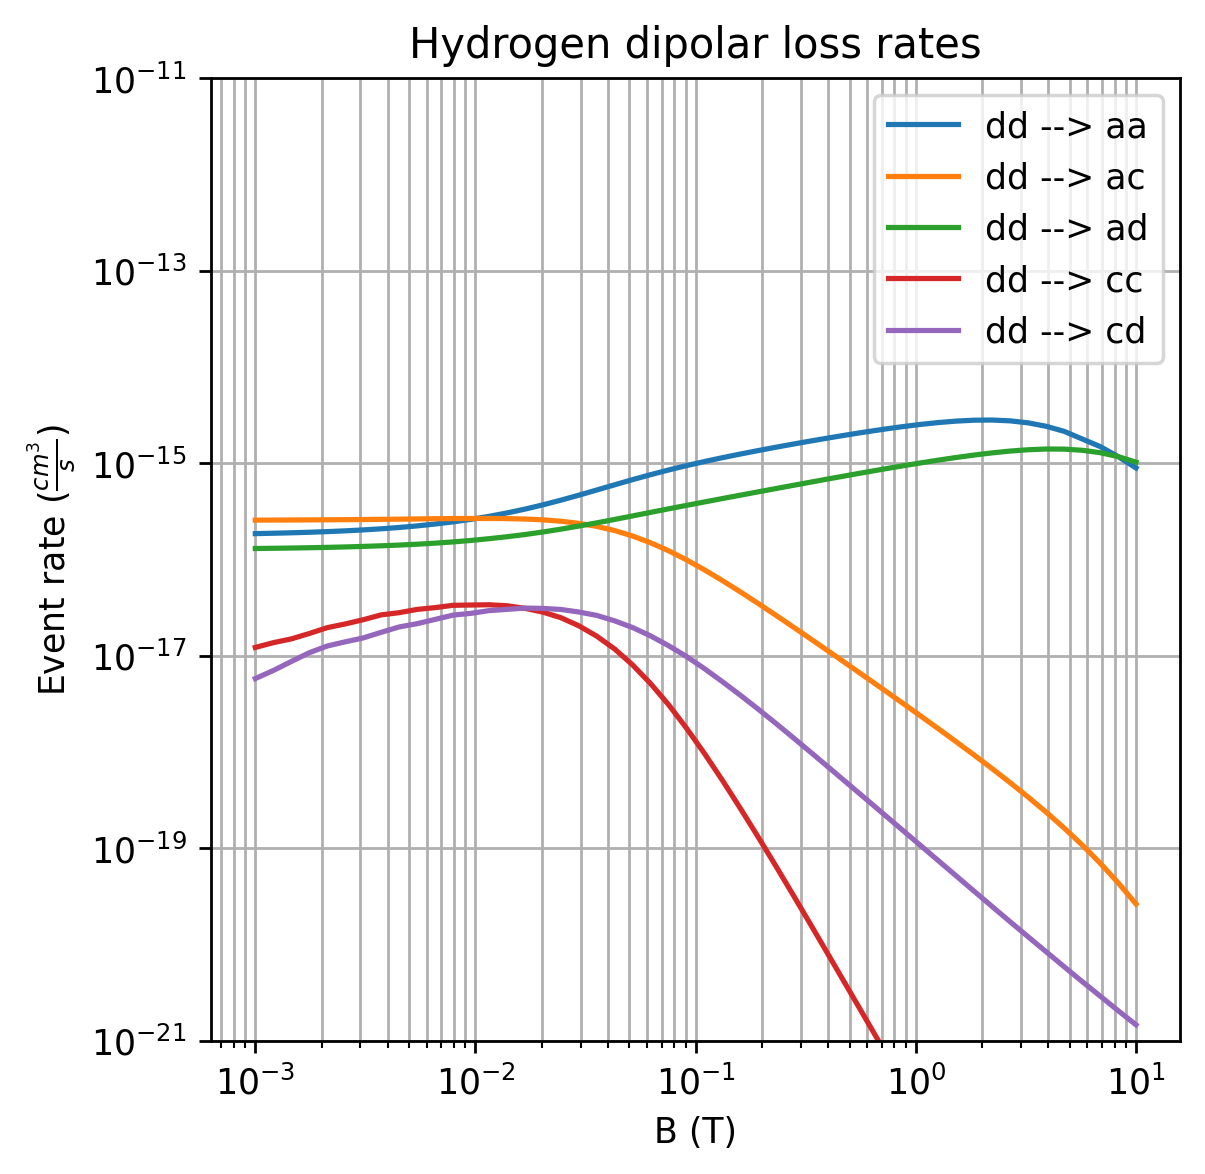

In [6]:


plt.figure(figsize=(5,5),dpi=250)
for ci in range(0,len(DipoleChannels)):
    Label='dd --> '+str(DipoleChannels[ci]['alphaprime'])+str(DipoleChannels[ci]['betaprime'])
    plt.plot(B_display,GVsB_H[ci],label=Label)
    plt.semilogy()
plt.xlabel("B (T)")
#plt.xlim(0.001, 10)
plt.ylabel(r'Event rate ($\frac{cm^3}{s}$)')
plt.ylim(1e-21, 1e-11)
plt.title("Hydrogen dipolar loss rates")
plt.grid(which='both')
plt.legend()
plt.loglog()
plt.savefig("./Plots/DipoleLossesHH.png",bbox_inches='tight',dpi=250)
plt.show()